In [24]:
import numpy as np
import matplotlib.pyplot as plt
import time
import torch
import os
from scipy.linalg import block_diag
from PO.utils import make_diagonalizable_matrix, make_positive_semidefinite, plot_loss, compare_losses, make_diagonalizable_matrix_complex, get_hankel_new

# PARTIAL OBSERVATIONS:
from PO.GRC.grc import GRC # new updated
from PO.OSC.osc_PO import OSC_PO # new updated
#from PO.OSC.osfcNFwSTU import OSCwSTU # TBD

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

GRC Model Runtime: 1.9846 seconds


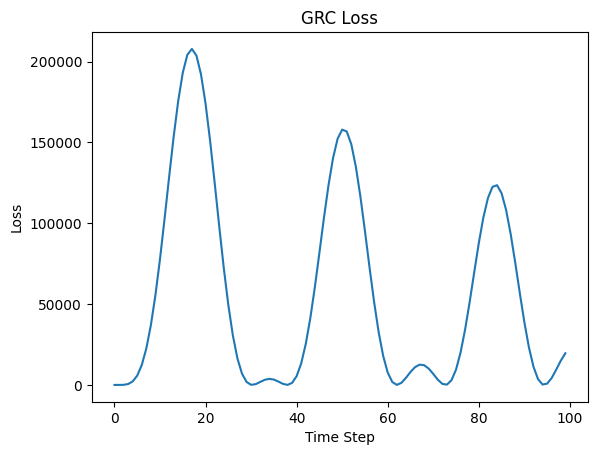

In [117]:
# GRC PO Experiments 

# Define system parameters
d, n = 2, 1  # Example dimensions
A = make_diagonalizable_matrix(d)
C = make_diagonalizable_matrix(d) 
B = np.random.randn(d, n)
Q = make_positive_semidefinite(d) 
R = make_positive_semidefinite(n)


# Base dimensions
# dx_base, du_base = 2, 1
# blocks = 5  # So final dx = 2 * 5 = 10, du = 1 * 5 = 5

# # Define small system matrices
# A_small = np.array([[1.0, 1.0], [0.0, 1.0]])
# B_small = np.array([[0.0], [1.0]])
# Q_small = np.eye(dx_base)
# R_small = np.eye(du_base)

# # Create block-diagonal matrices
# A = block_diag(*([A_small] * blocks))     # Shape (10, 10)
# B = block_diag(*([B_small] * blocks))     # Shape (10, 5)
# Q = block_diag(*([Q_small] * blocks))     # Shape (10, 10)
# R = block_diag(*([R_small] * blocks))     # Shape (5, 5)


# PARAMETERS
h = 5         # Number of eigenpairs
eta =  0.001  # Step size
T = 100


grc_po = GRC(A, B, C, Q, R, h, eta, T, name="GRC", nl=False)


# GRC
start_time = time.time()
grc_po.run()
end_time = time.time()
print(f"GRC Model Runtime: {end_time - start_time:.4f} seconds")

# # OSC_NL
# start_time = time.time()
# osc_nl.run()
# end_time = time.time()
# print(f"OSC NL Model Runtime: {end_time - start_time:.4f} seconds")

# OSC_w_STU
# start_time = time.time()
# osc_wstu.run()
# end_time = time.time()
# print(f"OSC_w_STU Model Runtime: {end_time - start_time:.4f} seconds")

plot_loss(grc_po, "GRC Loss")
# plot_loss(osc_nl, "OSC NL Loss")
# plot_loss(osc_wstu, "OSC STU Loss")

OSC Model Runtime: 9.5003 seconds


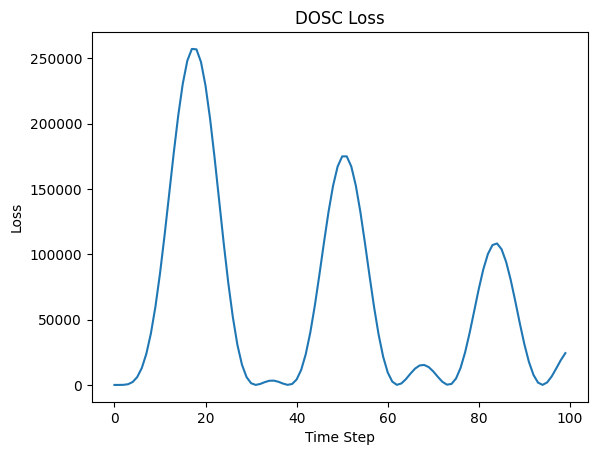

In [118]:
# OSFC PO Experiments 

# Define system parameters
d, n = 2, 1  # Example dimensions
# A = make_diagonalizable_matrix(d)
# C = make_diagonalizable_matrix(d) # has the same dimensons as A?
# # A_compl = make_diagonalizable_matrix_complex(d)
# B = np.random.randn(d, n)
# Q = make_positive_semidefinite(d) 
# R = make_positive_semidefinite(n)


# Base dimensions
# dx_base, du_base = 2, 1
# blocks = 5  # So final dx = 2 * 5 = 10, du = 1 * 5 = 5

# # Define small system matrices
# A_small = np.array([[1.0, 1.0], [0.0, 1.0]])
# B_small = np.array([[0.0], [1.0]])
# Q_small = np.eye(dx_base)
# R_small = np.eye(du_base)

# # Create block-diagonal matrices
# A = block_diag(*([A_small] * blocks))     # Shape (10, 10)
# B = block_diag(*([B_small] * blocks))     # Shape (10, 5)
# Q = block_diag(*([Q_small] * blocks))     # Shape (10, 10)
# R = block_diag(*([R_small] * blocks))     # Shape (5, 5)


# PARAMETERS
h = 5         # Number of eigenpairs
H = h
m = 10      # order of log T (for the new Hankel Matrix) (only way I can achieve "going down" if this is large
M = m
gamma = 0.1 # should be very small (less than 2/3 for marginally stable systems) (check 0.2) for the GPC to be smoother
eta =  0.001  # Step size
T = 100


osc_po = OSC_PO(A, B, C, Q, R, h, H, gamma, eta, T, name="DOSC", nl=False)


# OSC
start_time = time.time()
osc_po.run()
end_time = time.time()
print(f"OSC Model Runtime: {end_time - start_time:.4f} seconds")

# # OSC_NL
# start_time = time.time()
# osc_nl.run()
# end_time = time.time()
# print(f"OSC NL Model Runtime: {end_time - start_time:.4f} seconds")

# OSC_w_STU
# start_time = time.time()
# osc_wstu.run()
# end_time = time.time()
# print(f"OSC_w_STU Model Runtime: {end_time - start_time:.4f} seconds")

plot_loss(osc_po, "DOSC Loss")
# plot_loss(osc_nl, "OSC NL Loss")
# plot_loss(osc_wstu, "OSC STU Loss")

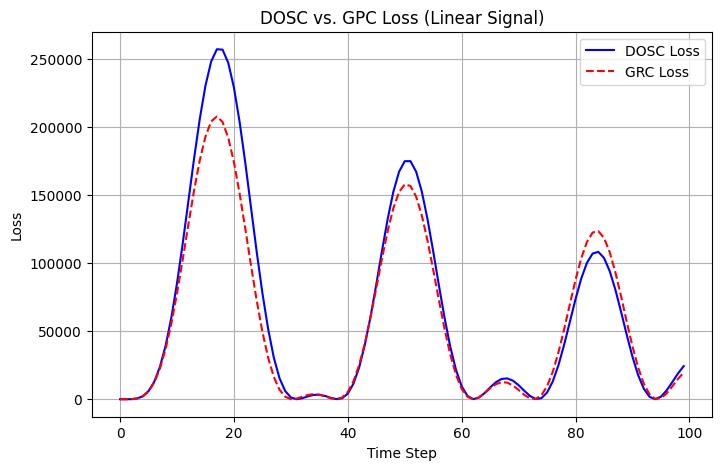

In [119]:
compare_losses([osc_po, grc_po], "DOSC vs. GRC Loss (Linear Signal)")

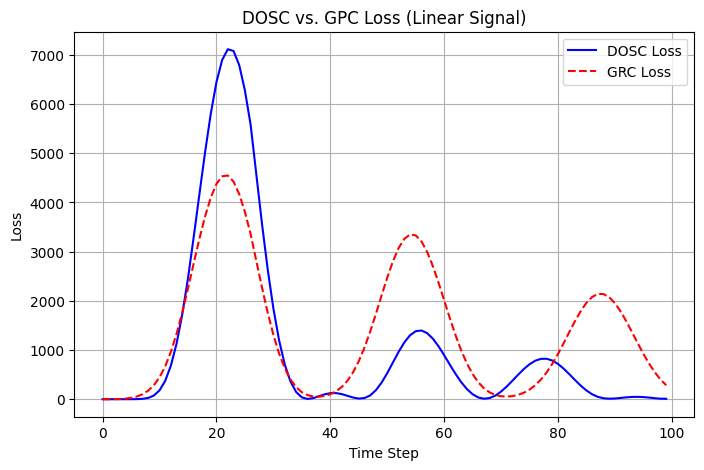

In [104]:
compare_losses([osc_po, grc_po], "DOSC vs. GRC Loss (Linear Signal)", save_path="PO/figures/dosc_vs_gpc_loss.png")

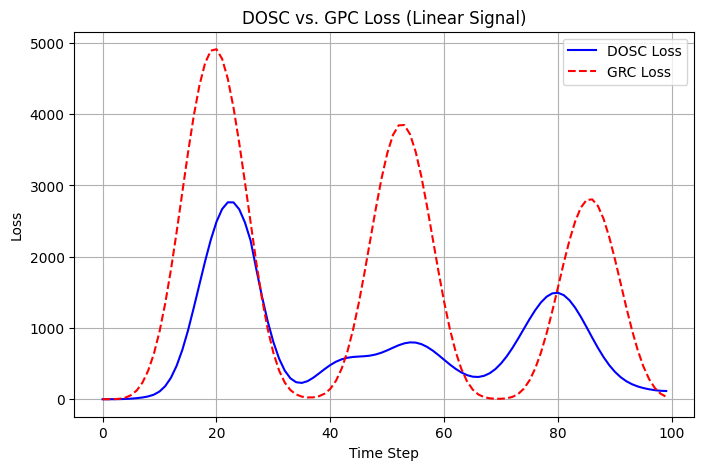

In [93]:
compare_losses([osc_po, grc_po], "DOSC vs. GRC Loss (Linear Signal)",  save_path="PO/figures/dosc_vs_gpc_loss2.png")